# Pymaceuticals Inc.
---

### Analysis

- There were 249 different mice studied based on a unique ID. However, one mouse, g989, had duplicate data for five different timepoints. Based on these duplicates, this mouse g989 was dropped from further analysis. The split between male and female mice were almost 50/50 (50.4% male mice in the study). The best drug regimens based on smallest tumor growth were Capomulin and Ramicane: mice under these regimens had tumors at the end of the study around 40 mm3 in size, whereas mice under the other eight regimens (including the placebo) had tumors over 50 mm3 in size. Capomulin and Ramicane also had the most mice – timepoint combination in the study. There appears to be a good positive correlation (0.84) between mouse weight and the average tumor volume in the study, that is the heavier the mouse, the larger tumor it has. Some other miscellaneous analyses were performed: analyzing the tumor size over time, tumor size steadily increased in mouse l509 under the Capomulin regimen up to timepoint 20 at which it began to shrink even under the original size at timepoint 35. 
 

In [624]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Previewed raw csv data and determined inner join was applicable using study results as first (left) dataframe -- 
# call merged dataframe unclean because later instructions are to clean the data set --
unclean_clinical_study_summary_pd = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
# Show both head() and tail() to ensure full range of data was properly merged --
unclean_clinical_study_summary_pd

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [92]:
# Checking the number of mice.
# checked data running value_counts() only and observed that length was 249 (# of different mice) and that     
#    there is a varying distribution of metadata per mouse --
unclean_clinical_study_summary_pd["Mouse ID"].value_counts().count()


249

In [522]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# analyze the distribution of data in the Timepoint field --
#       the result of this code -- clinical_study_summary_pd["Timepoint"].value_counts() --
#       shows that there are 250 Timepoints equaling "0", one more than the number of mice (249).
#       However, to be entirely sure, we must look for duplicates of the combination of Mouse ID and Timepoint 
#       setting the 'duplicated' method to these two columns will check for duplicates, and a response for each 
#       row will be either True or False --

# print the rows that have duplicate Mouse ID / Timepoint combination --

unclean_clinical_study_summary_pd.loc[(unclean_clinical_study_summary_pd.duplicated(["Mouse ID", "Timepoint"])== True), :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [529]:
# Optional: Get all the data for the duplicate mouse ID. 
unclean_clinical_study_summary_pd.loc[(unclean_clinical_study_summary_pd["Mouse ID"] == 'g989'), :]

# Note that there is unique data for Timepoints 25, 30 and 35 for mouse g989 --

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [113]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clinical_study_summary_pd = pd.DataFrame(unclean_clinical_study_summary_pd.loc[(unclean_clinical_study_summary_pd["Mouse ID"] != "g989"),:])
clinical_study_summary_pd.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [114]:
# Checking the number of mice in the clean DataFrame.
clinical_study_summary_pd ["Mouse ID"].value_counts().count()

248

## Summary Statistics

In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_by_drug = clinical_study_summary_pd.groupby(["Drug Regimen"])
tumor_vol_mean = grouped_by_drug["Tumor Volume (mm3)"].mean()
tumor_vol_median = grouped_by_drug["Tumor Volume (mm3)"].median()
tumor_vol_variance = grouped_by_drug["Tumor Volume (mm3)"].var()
tumor_vol_sd = grouped_by_drug["Tumor Volume (mm3)"].std()
tumor_vol_sem = grouped_by_drug["Tumor Volume (mm3)"].sem()
summary_stats_table = pd.DataFrame({"Mean Tumor Volume" : tumor_vol_mean, "Median Tumor Volume" : tumor_vol_median, \
    "Tumor Volume Variance"	: tumor_vol_variance, "Tumor Volume Std. Dev."	: tumor_vol_sd, \
    "Tumor Volume Std. Err." : tumor_vol_sem})
summary_stats_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [530]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

clinical_study_summary_pd.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

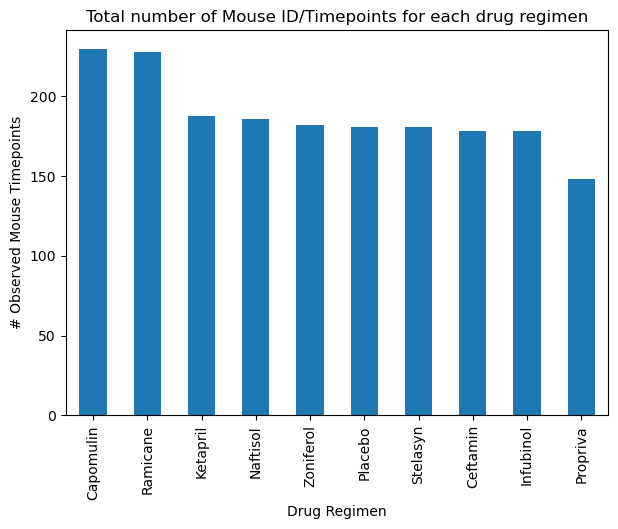

In [490]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# create a dataframe that counts number of Mouse ID/Timepoints and sorted by drug --
mouse_timepoints_count = grouped_by_drug[["Mouse ID", "Timepoint"]].count().sort_values("Drug Regimen")
# sort the values from greatest count to least just for the bar plot --
mouse_timepoints_count = mouse_timepoints_count.sort_values(by="Mouse ID", ascending=False)

count_chart = mouse_timepoints_count["Mouse ID"].plot(kind='bar', xlabel='Drug Regimen',  
    ylabel= "# Observed Mouse Timepoints", title = "Total number of Mouse ID/Timepoints for each drug regimen", figsize=(7,5))


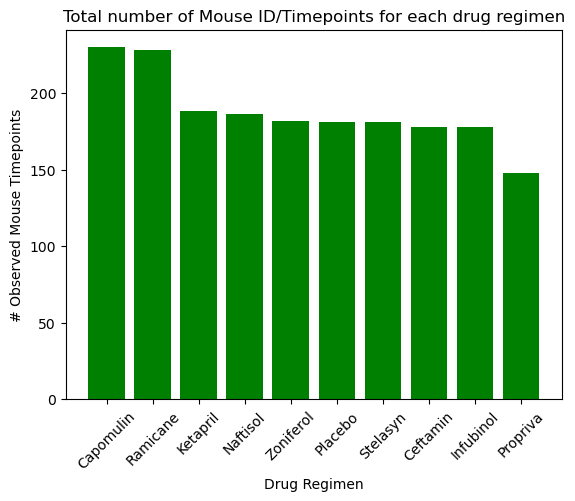

In [491]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_list = mouse_timepoints_count.index     # find labels for each bar in the plot --
y_values = mouse_timepoints_count["Mouse ID"]        # data series works for Matplotlib  -- 
plt.xlabel('Drug Regimen')
plt.xticks (rotation=45)
plt.ylabel('# Observed Mouse Timepoints')
plt.title('Total number of Mouse ID/Timepoints for each drug regimen')
plt.bar(drug_regimen_list, y_values, color="g", align="center")
plt.show()

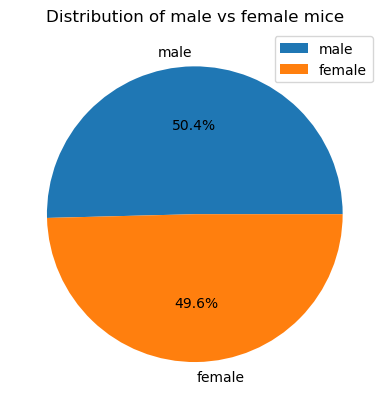

In [500]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Need to determine number of male and female mice. Do not want to use original .csv file as data has since been cleaned -- 

grouped_by_sex = clinical_study_summary_pd.groupby(["Sex"])
female_mice_count = len(grouped_by_sex['Mouse ID'].value_counts()['Female'])
male_mice_count = len(grouped_by_sex['Mouse ID'].value_counts()['Male'])

# need to create a dataframe, which includes both data and labels, for plotting the pie chart using pandas code --
male_female_df = pd.DataFrame([male_mice_count, female_mice_count], index=['male', 'female'], columns=[''])

male_female_pie = male_female_df.plot(kind = 'pie', y = 0, title = "Distribution of male vs female mice", autopct='%1.1f%%')

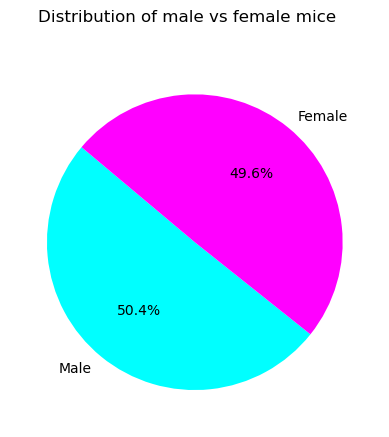

In [511]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
pieplot_colors = ["cyan", "magenta"]
plt.pie([male_mice_count, female_mice_count], labels=labels, colors=pieplot_colors,
        autopct="%1.1f%%", startangle=140)
plt.suptitle("Distribution of male vs female mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [512]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse. First group the data by mouse --
grouped_by_mouse = clinical_study_summary_pd.groupby(["Mouse ID"]) 
last_timepoint_per_mouse = grouped_by_mouse["Timepoint"].max()

# since Mouse ID becomes an index after calculating max timepoint value per mouse, need to reset the index --
last_timepoint_per_mouse = last_timepoint_per_mouse.reset_index()


In [513]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

clinical_study_filteredby_last_timepoint_pd = pd.merge(last_timepoint_per_mouse, clinical_study_summary_pd)
clinical_study_filteredby_last_timepoint_pd.head()   # print out to verify merge --

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


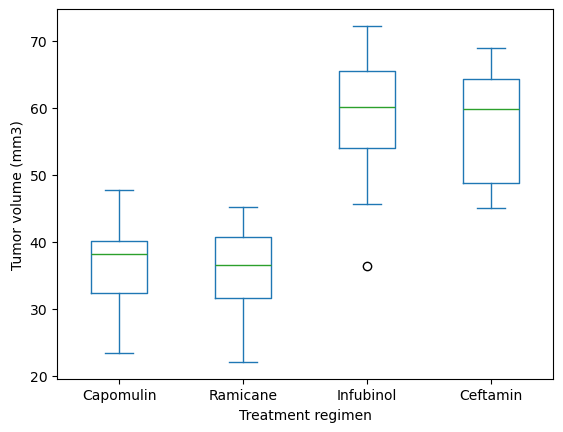

In [743]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

# this stores all tumor volume data for treatments filtered in code below --
tumor_volume_data = []        
# in order for side-by-side boxplots to be created, .plot method needs to qualify a dataframe, 
#          therefore created a dictionary to be converted to a dataframe later --   
tumor_volume_data_dict = []

for drug in treatments:
    
# filter the last timepoint per mouse data per each drug regimen to sort the tumor volume data --
    filtered_df = clinical_study_filteredby_last_timepoint_pd.loc[(clinical_study_filteredby_last_timepoint_pd["Drug Regimen"]==drug),:]

# now populate tumor volume data list from dataframe (3rd column / value '2') --
    for row in range(len(filtered_df)):
                
        _ = tumor_volume_data.append(filtered_df.iloc[row,2]) 

# also store tumor volume data and corresponding drug regimen in a new dictionary, for the boxplot --  
        new_dict = {
            drug: filtered_df.iloc[row,2]
        }
        tumor_volume_data_dict.append(new_dict)

# convert the tumor volume data to a dataframe --
tumor_volume_for_box = pd.DataFrame(tumor_volume_data_dict)

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# use pandas code for side-by-side box plots --
treatment_boxplot = tumor_volume_for_box[treatments].plot(kind='box')
treatment_boxplot.set_xlabel('Treatment regimen')
treatment_boxplot.set_ylabel('Tumor volume (mm3)')
plt.show()

In [762]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine outliers using upper and lower bounds

Cap_IQR = tumor_volume_for_box["Capomulin"].quantile([.25,.5,.75])[0.75] - tumor_volume_for_box["Capomulin"].quantile([.25,.5,.75])[0.25]
Capomulin_lower_bound = tumor_volume_for_box["Capomulin"].quantile([.25,.5,.75])[0.25] - (1.5*Cap_IQR)
Capomulin_upper_bound = tumor_volume_for_box["Capomulin"].quantile([.25,.5,.75])[0.75] + (1.5*Cap_IQR)
Ram_IQR = tumor_volume_for_box["Ramicane"].quantile([.25,.5,.75])[0.75] - tumor_volume_for_box["Ramicane"].quantile([.25,.5,.75])[0.25]
Ramicane_lower_bound = tumor_volume_for_box["Ramicane"].quantile([.25,.5,.75])[0.25] - (1.5*Ram_IQR)
Ramicane_upper_bound = tumor_volume_for_box["Ramicane"].quantile([.25,.5,.75])[0.75] + (1.5*Ram_IQR)
Inf_IQR = tumor_volume_for_box["Infubinol"].quantile([.25,.5,.75])[0.75] - tumor_volume_for_box["Infubinol"].quantile([.25,.5,.75])[0.25] 
Infubinol_lower_bound = tumor_volume_for_box["Infubinol"].quantile([.25,.5,.75])[0.25] - (1.5*Inf_IQR)
Infubinol_upper_bound = tumor_volume_for_box["Infubinol"].quantile([.25,.5,.75])[0.75] + (1.5*Inf_IQR)
Cef_IQR = tumor_volume_for_box["Ceftamin"].quantile([.25,.5,.75])[0.75] - tumor_volume_for_box["Ceftamin"].quantile([.25,.5,.75])[0.25]
Ceftamin_lower_bound = tumor_volume_for_box["Ceftamin"].quantile([.25,.5,.75])[0.25] - (1.5*Cef_IQR)
Ceftamin_upper_bound = tumor_volume_for_box["Ceftamin"].quantile([.25,.5,.75])[0.75] + (1.5*Cef_IQR)

stats_summary = {
    "Drug Regimen": treatments,
    "interquartile range": [Cap_IQR, Ram_IQR, Inf_IQR, Cef_IQR],
    "lower bound": [Capomulin_lower_bound, Ramicane_lower_bound, Infubinol_lower_bound, Ceftamin_lower_bound],
    "upper bound": [Capomulin_upper_bound, Ramicane_upper_bound, Infubinol_upper_bound, Ceftamin_upper_bound]
       }
pd.DataFrame(stats_summary)


,Drug Regimen,interquartile range,lower bound,upper bound
0,Capomulin,7.781863,20.704562,51.832015
1,Ramicane,9.098537,17.912664,54.306811
2,Infubinol,11.477135,36.832905,82.741446
3,Ceftamin,15.577752,25.355450,87.666458


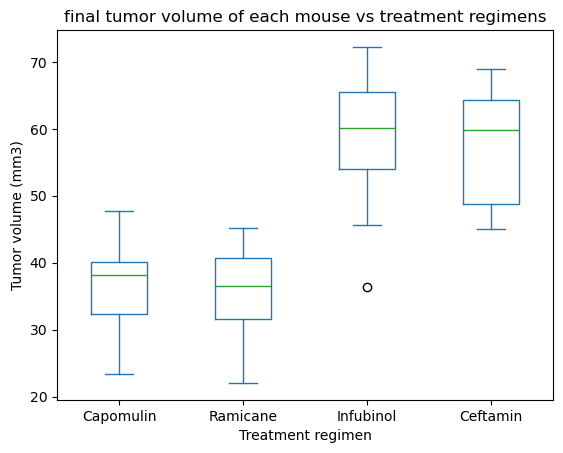

In [741]:
# Alternative method for determining data for boxplots and IQR. The method in this cell avoids the need for creating
#     and storing data in new lists, and setting up a loops --

# filter tumor volume by drug regime --  
only_Capomulin = clinical_study_filteredby_last_timepoint_pd.loc[ \
    clinical_study_filteredby_last_timepoint_pd['Drug Regimen'] == 'Capomulin', :]
Capo_data = only_Capomulin["Tumor Volume (mm3)"]  
Rami_data = clinical_study_filteredby_last_timepoint_pd.loc[ \
    clinical_study_filteredby_last_timepoint_pd['Drug Regimen'] == 'Ramicane', :]["Tumor Volume (mm3)"]
Infu_data = clinical_study_filteredby_last_timepoint_pd.loc[ \
    clinical_study_filteredby_last_timepoint_pd['Drug Regimen'] == 'Infubinol', :]["Tumor Volume (mm3)"] 
Ceft_data = clinical_study_filteredby_last_timepoint_pd.loc[ \
    clinical_study_filteredby_last_timepoint_pd['Drug Regimen'] == 'Ceftamin', :]["Tumor Volume (mm3)"]

 # convert the tumor volume data to a dataframe, which is needed for the boxplot code using pandas --   
Boxplot_data = pd.DataFrame({"Capomulin": Capo_data, "Ramicane": Rami_data, "Infubinol": Infu_data, "Ceftamin": Ceft_data})

# Plot the dataframe --
treatment_boxplot = Boxplot_data[treatments].plot(kind='box', title='final tumor volume of each mouse vs treatment regimens')
treatment_boxplot.set_xlabel('Treatment regimen')
treatment_boxplot.set_ylabel('Tumor volume (mm3)')
plt.show()
# plot matches method prescribed in the template --

In [749]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

iqr_Capomulin = Capo_data.quantile([.25,.5,.75])[0.75] - Capo_data.quantile([.25,.5,.75])[0.25]
iqr_Ramicane = Rami_data.quantile([.25,.5,.75])[0.75] - Rami_data.quantile([.25,.5,.75])[0.25]
iqr_Infubinol = Infu_data.quantile([.25,.5,.75])[0.75] - Infu_data.quantile([.25,.5,.75])[0.25]
iqr_Ceftamin = Ceft_data.quantile([.25,.5,.75])[0.75] - Ceft_data.quantile([.25,.5,.75])[0.25]

    # Determine outliers using upper and lower bounds
# it appears that one outlier is evident in the Infubinol dataset --

Infu_data.values.sort() 

iqr_Capomulin, iqr_Ramicane, iqr_Infubinol, iqr_Ceftamin, Infu_data
# Outlier of Infubinol dataset has a value of 36.32 mm3 (shown below) --
# IQR data matches method prescribed in the homework template --

(7.781863460000004,
 9.098536719999998,
 11.477135160000003,
 15.577752179999997,
 0      36.321346
 1      45.699331
 11     46.250112
 13     47.010364
 27     50.005138
 31     51.542431
 41     54.048608
 50     54.656549
 56     55.629428
 78     55.650681
 97     57.031862
 101    58.268442
 123    60.165180
 129    60.918767
 141    60.969711
 142    62.117279
 153    62.435404
 170    62.754451
 197    65.525743
 200    66.083066
 202    66.196912
 211    67.289621
 216    67.685569
 233    67.973419
 245    72.226731
 Name: Tumor Volume (mm3), dtype: float64)

## Line and Scatter Plots

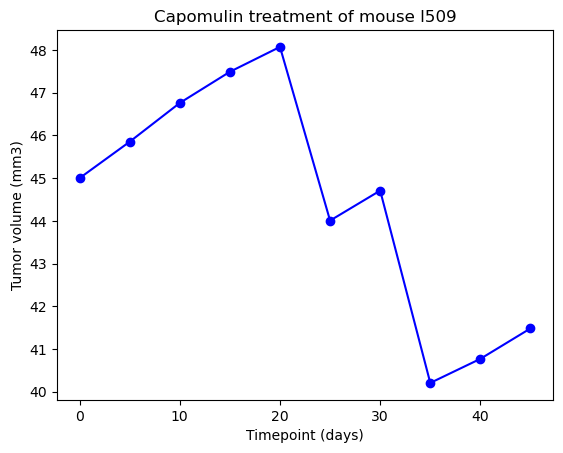

In [370]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# homework template suggested to select mouse l509 --
filtered_on_l509 = clinical_study_summary_pd.loc[clinical_study_summary_pd["Mouse ID"] == "l509", :]
x_axis = filtered_on_l509["Timepoint"].values
y_axis = filtered_on_l509["Tumor Volume (mm3)"].values
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor volume (mm3)")

l509_graph = plt.plot(x_axis, y_axis, marker ='o', color='blue')

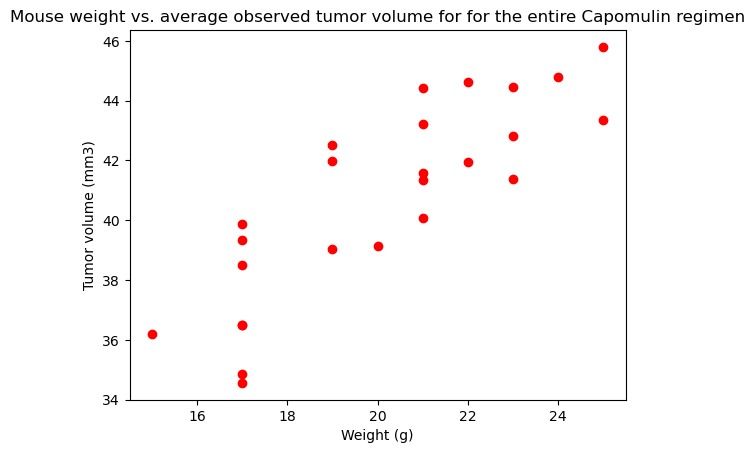

In [388]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# can use previously established Dataframe that filtered on Capomulin for last timepoint analysis since mouse weight is in this data set --
x_axis_scatter = only_Capomulin["Weight (g)"]    

# go back to clean data set, and filter on the Capomulin drug, since mean of tumor volume needs to be calculated --
filtered_on_Capomulin = clinical_study_summary_pd.loc[clinical_study_summary_pd["Drug Regimen"] == "Capomulin", :]

# group by mouse and then find the mean of tumor volume for each grouping --
grouped_by_mouse_Capomulin = filtered_on_Capomulin.groupby(["Mouse ID"])
y_axis_scatter = grouped_by_mouse_Capomulin["Tumor Volume (mm3)"].mean()

plt.title("Mouse weight vs. average observed tumor volume for for the entire Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor volume (mm3)")

plt.scatter(x_axis_scatter, y_axis_scatter, marker="o", color="red")
plt.show()

## Correlation and Regression

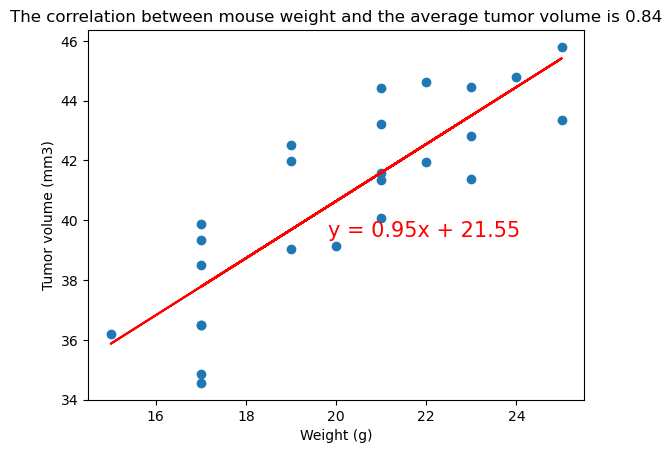

In [410]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# for some reason linregress was not in original homework template setup, so had to load here --
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_axis_scatter, y_axis_scatter)

# create and format the scatter plot, including displaying the linear regression equation on the plot --
plt.scatter(x_axis_scatter, y_axis_scatter)

# create the linear regression line --
plt.plot(x_axis_scatter,regress_values,"r-")
plt.figtext(0.5, 0.45, line_eq, fontsize=15, color = "r")
plot_title = (f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.title(plot_title)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor volume (mm3)")
# print(f"The r-squared is: {rvalue**2}")  #homework did not ask for this parameter --
plt.show()